In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime
from dateutil import parser

In [6]:
tw_data = pd.read_csv('twitter_data.csv',index_col=0)
tw_data.head()

,symbol,name,tweet_id,screen_name,bookmarks,favorites,created_at,text,lang,quotes,replies,retweets,time
_id,,,,,,,,,,,,,
671fe1125a22311369600909,BTC,bitcoin,1849905253916786767,hamptonism,1144,9408,Fri Oct 25 20:05:56 +0000 2024,Switzerland unveils a new statue honoring the ...,en,78,113,803,2024-10-28 19:08:02.786000
671fe1125a2231136960090a,BTC,bitcoin,1850228656704049285,Ashcryptoreal,88,9210,Sat Oct 26 17:31:02 +0000 2024,"If Bitcoin breaks $72,000 by the end \nof Octo...",en,21,952,1278,2024-10-28 19:08:02.786000
671fe1125a2231136960090b,BTC,bitcoin,1849812562323325395,Vivek4real_,23,4219,Fri Oct 25 13:57:37 +0000 2024,"Like, If you think Microsoft should convert $7...",en,14,163,339,2024-10-28 19:08:02.786000
671fe1125a2231136960090c,BTC,bitcoin,1849150584693076274,MarwanNawaz,6,458,Wed Oct 23 18:07:09 +0000 2024,"Michael Saylor would ""volunteer"" his Bitcoin t...",en,3,9,74,2024-10-28 19:08:02.786000
671fe1125a2231136960090d,BTC,bitcoin,1848948161806798989,naiivememe,1779,10437,Wed Oct 23 04:42:48 +0000 2024,Me leaving my 9-5 job when Bitcoin hits 250K\n...,en,104,272,889,2024-10-28 19:08:02.786000


In [8]:
btc_data = pd.read_csv("crytpo_data.csv", index_col = 0)
btc_data.head()

,symbol,name,price,dayHigh,dayLow,volume,open,close,timestamp,time
_id,,,,,,,,,,
67365919b8ace27fb7f3ddcc,BTC,Bitcoin USD,88480.80,91831.25,87491.0,1.318335e+11,90497.54,90497.54,1731614999,2024-11-14 20:10:01.360000
67364b09f8e7847322921a21,BTC,Bitcoin USD,89402.66,91831.25,87491.0,1.318335e+11,90497.54,90497.54,1731611400,2024-11-14 19:10:01.693000
67363cf98b6e0f996247e840,BTC,Bitcoin USD,89695.50,91831.25,87491.0,1.318335e+11,90497.54,90497.54,1731607800,2024-11-14 18:10:01.284000
67362ee9ef087629033c0954,BTC,Bitcoin USD,89110.99,91831.25,87491.0,1.318335e+11,90497.54,90497.54,1731604199,2024-11-14 17:10:01.389000
673620d97dde9fc48bf2114f,BTC,Bitcoin USD,88174.10,91831.25,87491.0,1.318335e+11,90497.54,90497.54,1731600600,2024-11-14 16:10:01.319000


In [19]:
btc_data["time"]

_id
67365919b8ace27fb7f3ddcc    2024-11-14 20:10:01.360000
67364b09f8e7847322921a21    2024-11-14 19:10:01.693000
67363cf98b6e0f996247e840    2024-11-14 18:10:01.284000
67362ee9ef087629033c0954    2024-11-14 17:10:01.389000
673620d97dde9fc48bf2114f    2024-11-14 16:10:01.319000
                                       ...            
671fcd9c4aac518e24176ab0    2024-10-28 17:45:00.878000
671fcd3dd4d6d91aa881bea7    2024-10-28 17:43:25.399000
671fcae9e7a827dbfe8545d0    2024-10-28 17:33:29.737000
671fc9e0862dc54995d32684    2024-10-28 17:29:04.644000
671fb860ac52f5b0f7c30c9d    2024-10-28 16:14:24.819000
Name: time, Length: 417, dtype: object

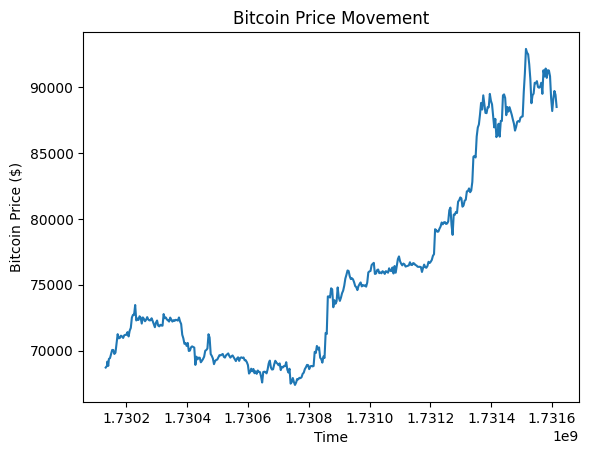

In [21]:
plt.plot(btc_data["timestamp"], btc_data["price"])
plt.xlabel('Time')
plt.ylabel('Bitcoin Price ($)')
plt.title('Bitcoin Price Movement')

plt.show()